# Computer Vision Contours

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

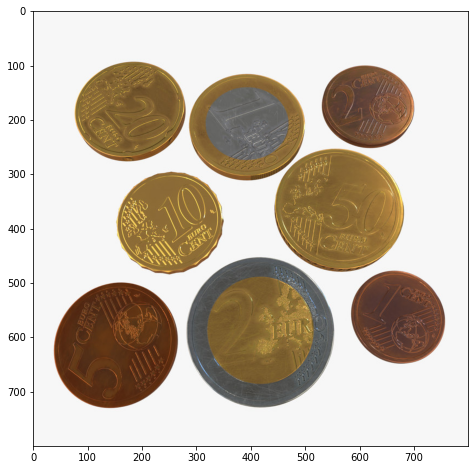

In [3]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

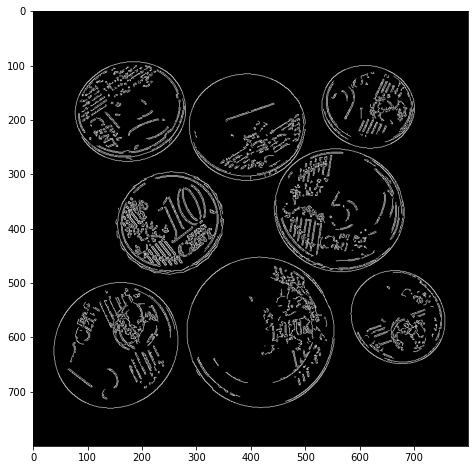

In [4]:
# Convert the image above to grayscale

gray_scale = cv2.cvtColor(color_coins, cv2.COLOR_BGR2GRAY)

# Apply some gaussian blur to it (try differente size kernels)

gray_scale_blur = cv2.GaussianBlur(gray_scale,(5,5),0)

# Apply Canny to find edges and display the image 

canny = cv2.Canny(gray_scale,100,200)


plt.figure(figsize = (12,8))
plt.imshow(canny, cmap='gray');

7302


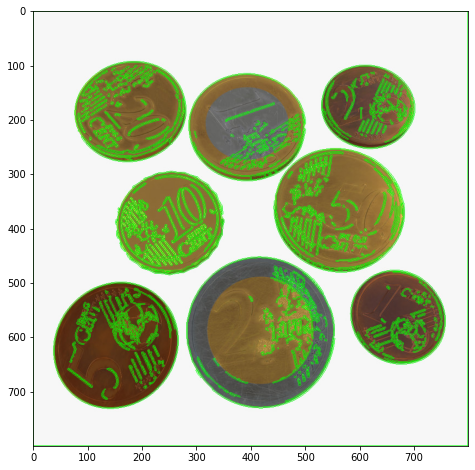

In [5]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?



ret ,th = cv2.threshold(canny, 250,255,cv2.THRESH_BINARY_INV)
cnt,h = cv2.findContours(th,cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
copy = rgb_coins.copy()
coins = cv2.drawContours(copy, cnt,-1,(0,255,0),1)

plt.figure(figsize = (12,8))
plt.imshow(coins, cmap='gray');
print(len(cnt))

[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [ ]:
# print the number of contours that has been found
print(len(cnt))

[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

Numbers of contours = 7589


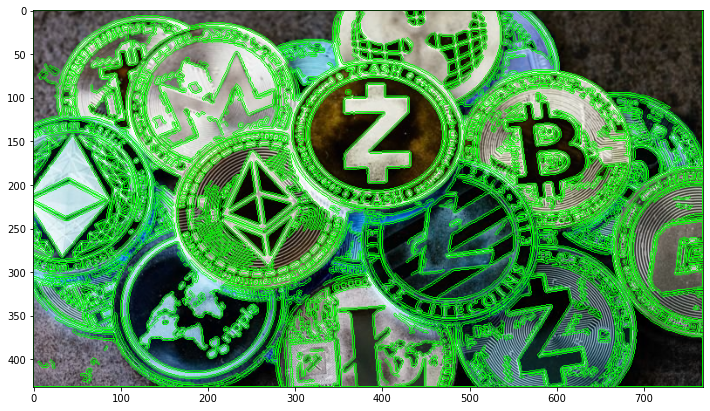

In [16]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise

crypto = cv2.imread('img/crypto.jpg', cv2.IMREAD_COLOR)

blur = cv2.GaussianBlur(crypto,(5,5),0)

canny = cv2.Canny(blur,100,200)


ret ,th = cv2.threshold(canny, 250,255,cv2.THRESH_BINARY_INV)
cnt,h = cv2.findContours(th,cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

#draw contours

coins_c = crypto.copy()
coins = cv2.drawContours(coins_c, cnt,-1,(0,255,0),1)

plt.figure(figsize = (12,8))
plt.imshow(coins_c, cmap='gray');
print(f'Numbers of contours = {len(cnt)}')


## Sorting Contours

### By area

In [17]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [40]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var


contours = get_contour_areas(cnt) 
#contours

In [41]:
# Print the contour areas to screen
len(contours)

7589

In [55]:
# Now sort the areas by biggest to smallest and print the sorted areas


sorted_cnt_max = sorted(cnt, key= cv2.contourArea, reverse= False)
sorted_cnt_max

[array([[[531, 431]],
 
        [[532, 431]]], dtype=int32),
 array([[[531, 428]],
 
        [[531, 429]]], dtype=int32),
 array([[[308, 365]],
 
        [[309, 365]]], dtype=int32),
 array([[[767, 359]],
 
        [[767, 360]]], dtype=int32),
 array([[[722, 350]],
 
        [[722, 351]]], dtype=int32),
 array([[[693, 323]],
 
        [[693, 324]]], dtype=int32),
 array([[[355, 315]],
 
        [[356, 315]]], dtype=int32),
 array([[[388, 255]],
 
        [[389, 255]]], dtype=int32),
 array([[[605, 241]],
 
        [[606, 241]]], dtype=int32),
 array([[[306, 153]],
 
        [[307, 153]]], dtype=int32),
 array([[[286, 112]],
 
        [[287, 113]],
 
        [[287, 112]]], dtype=int32),
 array([[[185, 336]],
 
        [[185, 337]],
 
        [[186, 337]],
 
        [[186, 336]]], dtype=int32),
 array([[[745, 265]],
 
        [[745, 266]],
 
        [[746, 266]],
 
        [[746, 265]]], dtype=int32),
 array([[[112, 253]],
 
        [[111, 254]],
 
        [[112, 254]],
 
        [[113, 

[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [59]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas
sorted_cnt = sorted(cnt, key= cv2.contourArea, reverse= False)
max = sorted_cnt[:5]
max

[array([[[531, 431]],
 
        [[532, 431]]], dtype=int32),
 array([[[531, 428]],
 
        [[531, 429]]], dtype=int32),
 array([[[308, 365]],
 
        [[309, 365]]], dtype=int32),
 array([[[767, 359]],
 
        [[767, 360]]], dtype=int32),
 array([[[722, 350]],
 
        [[722, 351]]], dtype=int32)]

In [57]:
# Filter out only the 5 biggest contours and print them
sorted_cnt = sorted(cnt, key= cv2.contourArea, reverse= True)
sorted_cnt


[array([[[0, 0]],
 
        [[0, 1]],
 
        [[0, 2]],
 
        ...,
 
        [[3, 0]],
 
        [[2, 0]],
 
        [[1, 0]]], dtype=int32),
 array([[[306, 214]],
 
        [[307, 213]],
 
        [[308, 213]],
 
        [[309, 213]],
 
        [[310, 213]],
 
        [[311, 213]],
 
        [[312, 214]],
 
        [[311, 215]],
 
        [[310, 215]],
 
        [[309, 215]],
 
        [[308, 215]],
 
        [[308, 216]],
 
        [[308, 217]],
 
        [[308, 218]],
 
        [[308, 219]],
 
        [[308, 220]],
 
        [[309, 220]],
 
        [[310, 220]],
 
        [[311, 221]],
 
        [[310, 222]],
 
        [[309, 222]],
 
        [[308, 222]],
 
        [[307, 222]],
 
        [[306, 222]],
 
        [[305, 222]],
 
        [[304, 222]],
 
        [[303, 223]],
 
        [[302, 223]],
 
        [[301, 224]],
 
        [[300, 225]],
 
        [[299, 226]],
 
        [[298, 227]],
 
        [[297, 227]],
 
        [[296, 228]],
 
        [[295, 229]],
 
        [[29

[Hint](# "Just slice the array!") 

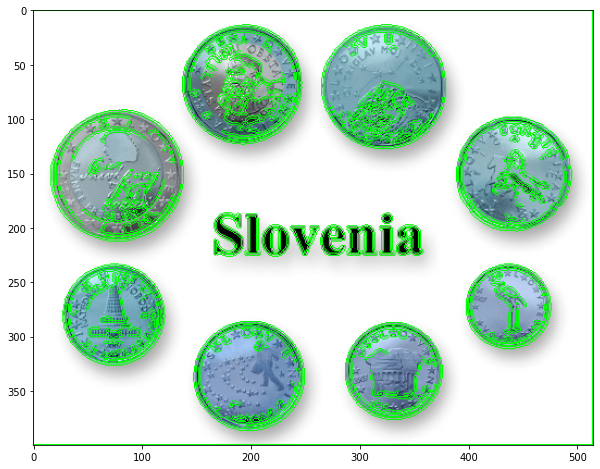

In [81]:
# Now in a clean image draw the contours you just filtered out and display it

img_new = cv2.imread('img\coins6.jpg')

blur = cv2.GaussianBlur(img_new,(5,5),0)
canny = cv2.Canny(blur,100,200)
ret ,th = cv2.threshold(canny, 250,255,cv2.THRESH_BINARY_INV)
cnt,h = cv2.findContours(th,cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

coins_copy = img_new.copy()
coins_slovenia = cv2.drawContours(coins_copy, cnt,-1,(0,255,0),1)

plt.figure(figsize = (12,8))
plt.imshow(coins_slovenia, cmap='gray');

In [ ]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!

img_new = 

### By X coordinate (left to right)

In [ ]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [ ]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right


In [ ]:
# Draw the contours one at a time and display the images on screen 


[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [ ]:
# Can you think of other ways to sort contours?
